# Exploratory Data Analysis

Toy Dataset: Iris Dataset: [https://archive.ics.uci.edu/ml/datasets/Iris]

- A simple dataset to learn the basics.
- 3 flowers of Iris species.
- 1936 by Ronald Fisher.
- Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg

#### Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.
- Note - always keep the objective in mind while performing EDA

## Import Dependencies and Datasets

In [2]:
# import neccessary libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
import seaborn as sns

# configurations
%matplotlib inline
sns.set_style('whitegrid')

In [11]:
# import dataset
df = pd.read_csv('iris.data', names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species'])
# display first 5 rows of dataset
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Data Analysis

In [13]:
# print dimensions
print('# rows    : ', df.shape[0])
print('# columns : ', df.shape[1])

# rows    :  150
# columns :  5


In [15]:
# find out how many entries are in the dataset for each Specie class
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

- Therefore, the dataset is equally distributed between each values
- Balanced datasets

### 2D Scatter Plots

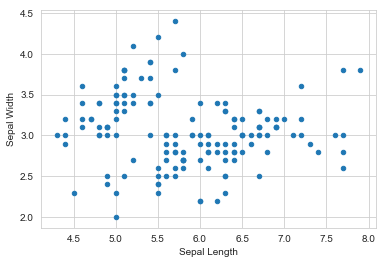

In [16]:
# plot a scatter plot
df.plot(kind='scatter', x='Sepal Length', y='Sepal Width')

C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


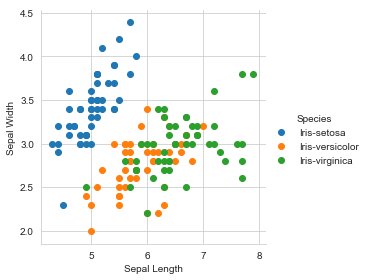

In [17]:
# let's segment the scatter plot by species
sns.FacetGrid(df, hue='Species', size=4) \
   .map(plt.scatter, 'Sepal Length', 'Sepal Width') \
   .add_legend()

- With 'Sepal Length' & 'Sepal Width' features, we can distinguish 'Sertosa' flowers from the other two
- Separating 'Versicolor' from 'Virginica' is much harder as they have considerable overlap

### 3D Scatter Plot
- Plotting a 3D Scatter plot between 
    - x = 'SepalLength'
    - y = 'SepalWidth'
    - z = 'PetalLength'


https://plot.ly/pandas/3d-scatter-plots/

### Pair Plot
- Draw pairwise scatter plots between all features of the dataset
- Diplays a total of 4C2 (=6) 2D plots between each features
- **Dis-advantages of pair-plots :**
    - Beneficial to use when number of features are less (4,5,6 etc)
    - Cannot visualize higher dimensional patterns in 3-D and 4-D
    - Only possible to view 2D patterns

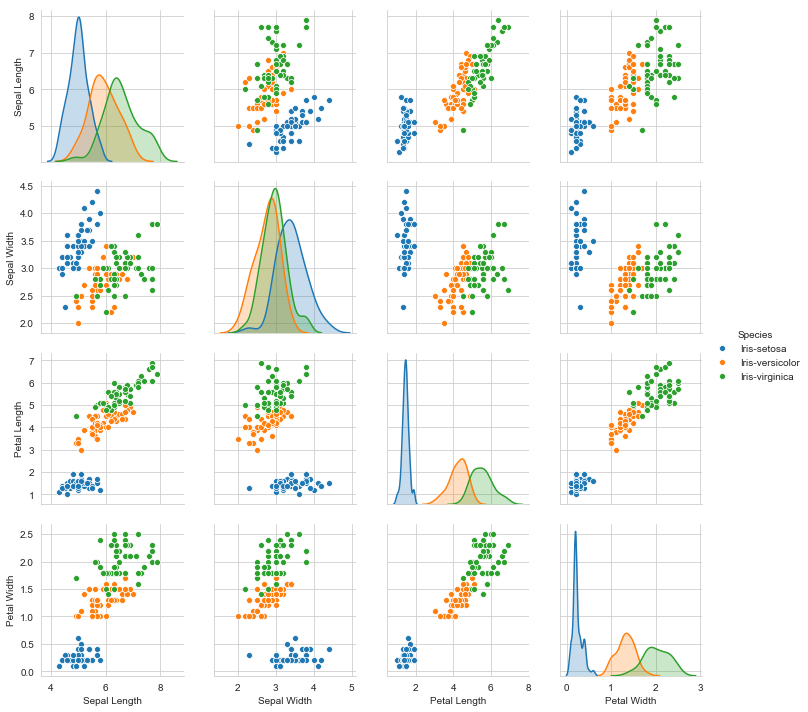

In [19]:
# pairwise scatter plot : Pair plot
sns.pairplot(df, hue='Species')

#### Observations
- From the 1st row, (`Sepal Length` vs `Petal Length`) & (`Sepal Length` vs `Petal Width`) segragate the `Species` much better than (`Sepal Length` vs `Sepal Width`)
- `Petal Length` & `Petal Width` are most useful features to identify the various flower types
- `Setosa` is the best separated when we plot (`Petal Length` vs `Petal Width`)
- While `Setosa` can be easily identified (**linearly seperable**), `Virnica` and `Versicolor` have some overlap (**almost linearly seperable**)

### Univariate Analysis - Histogram & PDF
- Let's plot a histogram for all iris species
- Histogram plots how many points exist in each bin (range of data points)
- PDF (Probability Distribution Function) is a smooth form of a histogram

In [54]:
# create individual DFs for each Specie
iris_setosa = df.loc[df["Species"] == "Iris-setosa"];
iris_virginica = df.loc[df["Species"] == "Iris-virginica"];
iris_versicolor = df.loc[df["Species"] == "Iris-versicolor"];

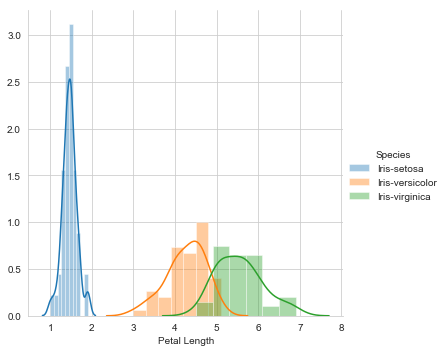

In [29]:
# histogram & PDF on 'Petal Length'
sns.FacetGrid(df, hue='Species', size=5)\
   .map(sns.distplot, 'Petal Length')\
   .add_legend()

C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


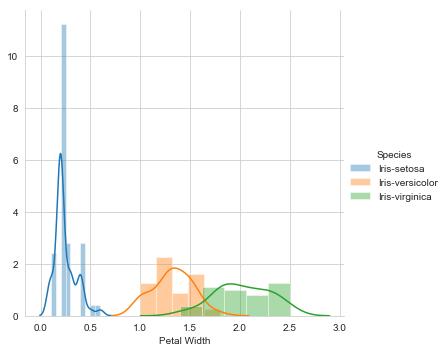

In [31]:
# histogram and PDF on 'Petal Width'
sns.FacetGrid(df, hue = 'Species', size = 5) \
.map(sns.distplot, 'Petal Width') \
.add_legend()

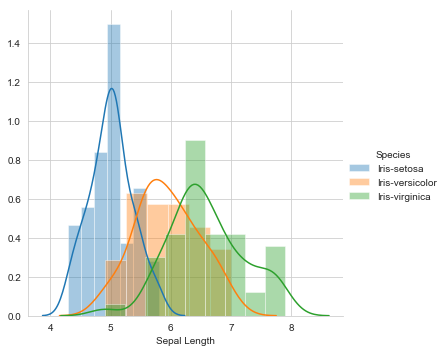

In [33]:
# histogram and PDF on 'Sepal Length'
sns.FacetGrid(df, hue='Species', size=5) \
.map(sns.distplot, 'Sepal Length') \
.add_legend()

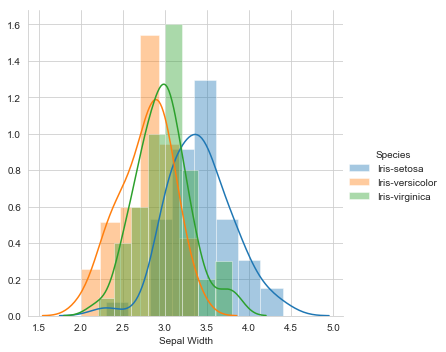

In [36]:
# histogram and PDF on 'Sepal Width'
sns.FacetGrid(df, hue='Species', size=5) \
.map(sns.distplot, 'Sepal Width') \
.add_legend()

- From the above univariate analysis we can conclude that amongst all features, `Petal Length` performs the best when we want to segment the data points by `Species`

#### Interpreting a PDF:
- why is it called a density plot?
- Why is it called a probability plot?
- for each value of petal_length, what does the value on y-axis mean?
- Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
- Using just one feature, we can build a simple "model" suing if..else... statements.

#### Disadvantage of PDF
- Can we say what percentage of versicolor points have a petal_length of less than 5?

### CDF - Cumulative Distributive Function

PDF       :  [0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
Bin Edges :  [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


Text(0,0.5,'Probability')

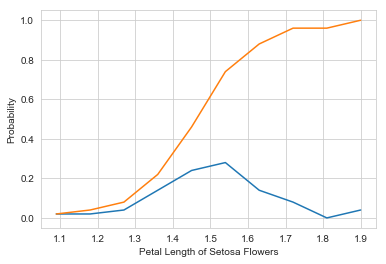

In [68]:
# Plot CDF of Petal_length for Setosa specie
counts, bin_edges = np.histogram(iris_setosa['Petal Length'], bins=10, density = True)
pdf = counts/(sum(counts))
print('PDF       : ',pdf);
print('Bin Edges : ', bin_edges);

# Compute & plot CDF
cdf = np.cumsum(pdf)  # fnc for cumulative sum
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Petal Length of Setosa Flowers')
plt.ylabel('Probability')

- Blue plot is PDF
- Orange plot is CDF

#### Significance of CDF
- for x = 1.6, CDF = 0.82, which means that there are 82% of setosa flowers that have Petal Length <= 1.6

PDF       :  [0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
Bin Edges :  [4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]


Text(0,0.5,'Probability')

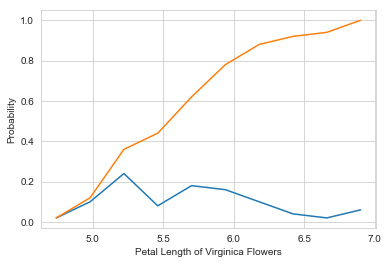

In [69]:
# plot CDF for Petal Length of Virginica specie
counts, bin_edges = np.histogram(iris_virginica['Petal Length'], bins=10, density = True)
pdf = counts/(sum(counts))
print('PDF       : ',pdf);
print('Bin Edges : ', bin_edges);

# Compute & plot CDF
cdf = np.cumsum(pdf)  # fnc for cumulative sum
plt.plot(bin_edges[1:], pdf)  # plot PDF
plt.plot(bin_edges[1:], cdf)  # plot CDF
plt.xlabel('Petal Length of Virginica Flowers')
plt.ylabel('Probability')

PDF       :  [0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
Bin Edges :  [3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


Text(0,0.5,'Probability')

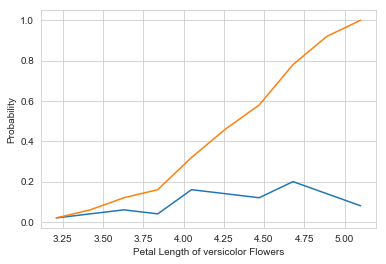

In [70]:
# plot CDF for Petal Length of versicolor specie
counts, bin_edges = np.histogram(iris_versicolor['Petal Length'], bins=10, density = True)
pdf = counts/(sum(counts))
print('PDF       : ',pdf);
print('Bin Edges : ', bin_edges);

# Compute & plot CDF
cdf = np.cumsum(pdf)  # fnc for cumulative sum
plt.plot(bin_edges[1:], pdf)  # plot PDF
plt.plot(bin_edges[1:], cdf)  # plot CDF
plt.xlabel('Petal Length of versicolor Flowers')
plt.ylabel('Probability')

Setosa
PDF       :  [0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
Bin Edges :  [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]

Virginica
PDF       :  [0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
Bin Edges :  [4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]

Versicolor
PDF       :  [0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
Bin Edges :  [3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


Text(0,0.5,'Probability')

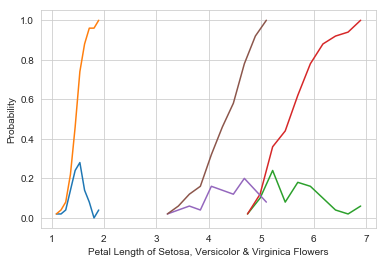

In [75]:
# Plot CDF of Petal_length for Setosa specie
counts, bin_edges = np.histogram(iris_setosa['Petal Length'], bins=10, density = True)
pdf = counts/(sum(counts))
print('Setosa')
print('PDF       : ',pdf);
print('Bin Edges : ', bin_edges);

# Compute & plot CDF
cdf = np.cumsum(pdf)  # fnc for cumulative sum
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

# plot CDF for Petal Length of Virginica specie
counts, bin_edges = np.histogram(iris_virginica['Petal Length'], bins=10, density = True)
pdf = counts/(sum(counts))
print('\nVirginica')
print('PDF       : ',pdf);
print('Bin Edges : ', bin_edges);

# Compute & plot CDF
cdf = np.cumsum(pdf)  # fnc for cumulative sum
plt.plot(bin_edges[1:], pdf)  # plot PDF
plt.plot(bin_edges[1:], cdf)  # plot CDF

# plot CDF for Petal Length of Versicolor specie
counts, bin_edges = np.histogram(iris_versicolor['Petal Length'], bins=10, density = True)
pdf = counts/(sum(counts))
print('\nVersicolor')
print('PDF       : ',pdf);
print('Bin Edges : ', bin_edges);

# Compute & plot CDF
cdf = np.cumsum(pdf)  # fnc for cumulative sum
plt.plot(bin_edges[1:], pdf)  # plot PDF
plt.plot(bin_edges[1:], cdf)  # plot CDF
plt.xlabel('Petal Length of Setosa, Versicolor & Virginica Flowers')
plt.ylabel('Probability')

#### Why is CDF useful?
Looking at the plot above, we can easily segment setosa flowers saying 
<br>`if PL < 2, then Setosa`

For Versicolor & Virginica, if we say that
<br>`if 2 < PL < 5, then Versicolor` # from CDF, we know that this will be correct 95% of the times
<br>and
<br>`if PL > 5, then Virginica` # from CDF, we know that this will be correct 90% of the times

### Mean, Variance and Standard Deviation
#### Mean 
- Sum of all observations divided by the total number of observations

In [92]:
# calculate mean of PL for all species
print('Mean of Petal Length for Setosa     : ', iris_setosa['Petal Length'].mean())  # PL = Petal Length
print('Mean of Petal Length for Versicolor : ', iris_versicolor['Petal Length'].mean())
print('Mean of Petal Length for Virginica  : ', iris_virginica['Petal Length'].mean())

Mean of Petal Length for Setosa     :  1.464
Mean of Petal Length for Versicolor :  4.26
Mean of Petal Length for Virginica  :  5.552


- Setosa has smaller petal lengths
- Versicolor & Virginica has greater petal lengths 
- Therefore, PL(Virginca) > PL(Versicolor) >> PL(Setosa)

In [80]:
# NOTE - another way to print mean with Numpy
print(np.mean(iris_setosa['Petal Length']))

1.464


In [84]:
# effect of outlier on mean
# suppose we add an outlier to the list of PL for Setosa flowers, then it will bring a drastic change in the mean
print('Mean of Petal Length for Setosa with outlier : ', np.mean(np.append(iris_setosa['Petal Length'], 500)))

Mean of Petal Length for Setosa with outlier :  11.23921568627451


- Mean switched from 1.464 to 11.239
- therefore, a simple error in the records could bring drastic change in the mean

#### Variance
- Variance can be thought off as the spread of the dataset - variation in the dataset
- Variance is defined as the **average of (square of (summation of the (difference between data point and the mean)))**

#### Standard Deviation
- Square Root of Variance is Standard Deviation

In [91]:
# calculate standard deviation of petal lengths for all species
print('Std Dev of PL for Setosa     : ', round(np.std(iris_setosa['Petal Length']), 2))
print('Std Dev of PL for Versicolor : ', round(np.std(iris_versicolor['Petal Length']), 2))
print('Std Dev of PL for Virginica  : ', round(np.std(iris_virginica['Petal Length']), 2))

Std Dev of PL for Setosa     :  0.17
Std Dev of PL for Versicolor :  0.47
Std Dev of PL for Virginica  :  0.55


#### Significance of Std Dev
- For PL of Setosa, we know that
    - Mean = 1.464 
    - Std Dev = 0.17
    - Therefore, the data points lie between 1.464 +- 0.17, i.e. between 1.294 & 1.634
    
### Variance & Std Dev with an Outlier
- if we add an outlier in the PL dataset for Setosa

In [99]:
print('Without Outlier')
print('Mean : ', np.mean(iris_setosa['Petal Length']))
print('Std Dev : ', np.std(iris_setosa['Petal Length']))
print('\nWith an outlier')
print('Mean     : ', np.mean(np.append(iris_setosa['Petal Length'], 500)))
print('Std Devn : ', np.std(np.append(iris_setosa['Petal Length'], 500)))

Without Outlier
Mean :  1.464
Std Dev :  0.17176728442867115

With an outlier
Mean     :  11.23921568627451
Std Devn :  69.1214222303734


- Therefore, one error or outlier can drastically change both mean and standard deviation

### Median
- **Median** : 
    - Median is calculated by arranging all observations (n) in order and then picking the middle value (n+1 / 2)
    - If number of observations (n) are even, then we take the mean of the 2 central values
- To overcome this drastic effect of outlier on mean and standard deviation, we utilise median
- Let's see the **effect of outlier on `Median` vs `Mean` vs `Std Dev`**

In [106]:
# for PL for Setosa flower specie
print('Without Outlier')
print('Median  : ', np.median(iris_setosa['Petal Length']))
print('Mean    : ', np.mean(iris_setosa['Petal Length']))
print('Std Dev : ', np.std(iris_setosa['Petal Length']))
print('\nWith an Outlier')
print('Median  : ', np.median(np.append(iris_setosa['Petal Length'], 500)))
print('Mean    : ', np.mean(np.append(iris_setosa['Petal Length'], 500)))
print('Std Dev : ', np.std(np.append(iris_setosa['Petal Length'], 500)))

Without Outlier
Median  :  1.5
Mean    :  1.464
Std Dev :  0.17176728442867115

With an Outlier
Median  :  1.5
Mean    :  11.23921568627451
Std Dev :  69.1214222303734


- We can observe that where `mean` and `std dev` saw huge changes due to 1 outlier, `median` is almost unchanged
- Median value can only get corrupted if more than 50% of the observations are corrupted

### Percentile, Quantile, IQR
**Percentile** 
- Percentile tells us at which rank does the value lie in a sorted array, example, the median lies at the 50th percentile
- Similarly, in a sorted array, the value at the 10th rank is the 10th percentile value. In other words, it tells us what percentage of values are less than 10% rank and what values are greater.

**Quantiles**
- The 25th, 50th, 75th & 100th percentile values are called QUANTILES.
    - 1st Quantile = 25th percentile
    - 2nd Quantile = 50th percentile
    - 3rd Quantile = 75th percentile
    - 4th Quantile = 100th percentile
- Quantile values are plotted with **`Boxplots`**

In [112]:
# print quantile values
# 0th, 25th, 50th & 75th percentile values
print('Quantiles for PL of Setosa     : ', np.percentile(iris_setosa['Petal Length'], np.arange(0,100,25)))  # prints percentile values from 0th to 100th quantile with the gap of 25
print('Quantiles for PL of Versicolor : ', np.percentile(iris_versicolor['Petal Length'], np.arange(0, 100, 25)))
print('Quantiles for PL of Virginica  : ', np.percentile(iris_virginica['Petal Length'], np.arange(0, 100, 25)))

Quantiles for PL of Setosa     :  [1.    1.4   1.5   1.575]
Quantiles for PL of Versicolor :  [3.   4.   4.35 4.6 ]
Quantiles for PL of Virginica  :  [4.5   5.1   5.55  5.875]


In [114]:
# print 90th percentile values
print('90th percentile value for PL of Setosa     : ', np.percentile(iris_setosa['Petal Length'], 90))
print('90th percentile value for PL of Versicolor : ', np.percentile(iris_versicolor['Petal Length'], 90))
print('90th percentile value for PL of Virginica  : ', np.percentile(iris_virginica['Petal Length'], 90))

90th percentile value for PL of Setosa     :  1.7
90th percentile value for PL of Versicolor :  4.8
90th percentile value for PL of Virginica  :  6.3100000000000005


#### Significance of 90th percentile
- Suppose for an eCommerce company, we have the data of delivery days.
- If 90th percentile is 3 days, 95th percentile is 4 days and 99th percentile is 5 days then we know that 99% of customers receive their deliveries within 5 days

### MAD - Median Absolute Deviation
- How far away are the data points from the central tendency (median)
- Equivalent to Std Deviation by replacing mean with the median in the equation

### IQR - Inter Quartile Range
- The range of values between the 25th quartile value and the 75th quartile value is called the Inter Quartile Range
- 50% of the data lies between IQR

In [119]:
# median absolute deviation
from statsmodels import robust
print('Median Absolute Deviation')
print('MAD of PL of Setosa     : ', np.round(robust.mad(iris_setosa['Petal Length']),2))
print('MAD of PL of Versicolor : ', np.round(robust.mad(iris_versicolor['Petal Length']),2))
print('MAD of PL of Virginica  : ', np.round(robust.mad(iris_virginica['Petal Length']),2))

Median Absolute Deviation
MAD of PL of Setosa     :  0.15
MAD of PL of Versicolor :  0.52
MAD of PL of Virginica  :  0.67


### Boxplots and Whiskers


- **Box-plot with whiskers** are another method of visualizing the  1-D scatter plot more intuitivey
- They utilise the concept of median, percentile, quantile
- Displays the IQR
- Whiskers in the plot below donot correposnd to the min and max values.
- Box-plot can be visualized as a PDF on the side-ways.

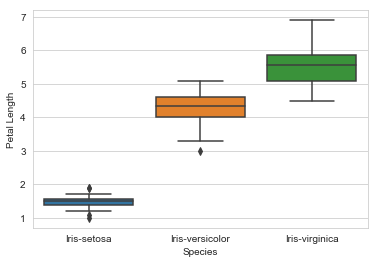

In [122]:
# plot boxplots for 3 species
sns.boxplot(x='Species', y='Petal Length', data=df)

- In the box of the boxplot, there are 3 lines
    - Middle line is 50th percentile
    - Bottom line is 25th percentile
    - Top line is 75th percentile

#### Significance of Boxplots
- From the above boxplot, we can directly say that
    - if PL < 2, then Setosa, with 0% error
    - if 2 < PL < 2, then Versicolor, with 25% error of Viriginica flower's classification
    - if PL > 5, then Virginica, then ~5 to 10% error of Versicolor flower's classification

### Violin Plots
- It overcomes the disadvantages of both boxplots & histograms & PDFs
- Combines the benefits of both plots
- Gives us the best of both worlds
- In a violin plot, denser regions of the data are fatter, and sparser ones thinner 

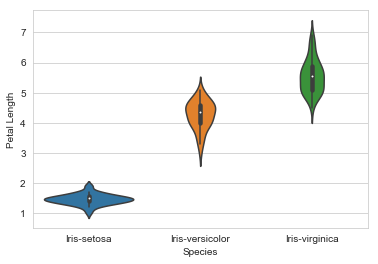

In [123]:
# plot violin plots
sns.violinplot(x='Species', y='Petal Length', data=df)

- The box inside the violin plot is the boxplot
    - white centre is 50th percentile
    - top & bottom of the box are 75th & 25th quartiles respectively
- plots a histogram PDF on the sides of the boxplot

## Multivariate Analysis - Probablity Density Contour Plots
### Jointplots

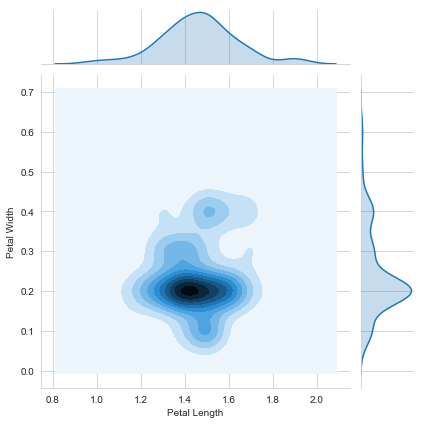

In [126]:
# plot jointplot
# density plot, contour plot
sns.jointplot(x='Petal Length', y='Petal Width', data=iris_setosa, kind ='kde')

- The darker shade has greater density of data points and the lighter shades have lower density of data points
- Imagine looking at the PDF hill from the top
- Visualise the contour plot by this 3D plot (hill like) - https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Gaussian_2d.svg/300px-Gaussian_2d.svg.png
- The darker the region, the higher the hill
- All points on each boundary loops have the same height on the hill region

#### Significance
- It gives us the sense of density of data points, by looking at contour plot we get to know where are our maximum data points located

#### Note
- 1D Density plot - PDF
- 2D Density plot - Contour Plot